# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Understanding the Data

In [2]:
data = pd.read_csv("C:/Users/senth/OneDrive/Documents/train.csv")

In [3]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
data.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [5]:
data.shape

(550068, 12)

In [6]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [8]:
data.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [9]:
data.Occupation.unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

In [10]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [11]:
data.Product_Category_2.value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [12]:
data.Product_Category_2.fillna(8.0,inplace = True)

In [13]:
data.Product_Category_2.isnull().sum()

0

In [14]:
data.Product_Category_3.value_counts()

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64

In [15]:
data.isnull().mean()

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.000000
Product_Category_3            0.696727
Purchase                      0.000000
dtype: float64

Since the Null percentage is almost 70% We can drop the column(Product_Category_3)

In [16]:
data.drop('Product_Category_3',axis = 1,inplace = True)

We can also drop User id and Product id which does not affect sales

In [17]:
data.drop(['User_ID','Product_ID'],axis = 1, inplace = True)

In [18]:
data.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

As we know, Product_Category_1 and Occupation are discrete but it takes as continuous. So we have to convert it into str type

In [19]:
data['Product_Category_1']=data["Product_Category_1"].astype(str)

In [20]:
data["Occupation"]=data["Occupation"].astype(str)

In [21]:
data.Product_Category_1.value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64

In [22]:
data.Age.value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [23]:
from sklearn import preprocessing

In [24]:
label_encoder = preprocessing.LabelEncoder()

In [25]:
data.Age= label_encoder.fit_transform(data.Age)

In [26]:
data['Age'] = data['Age'].astype(str)

In [27]:
data.Age.value_counts()

2    219587
3    110013
1     99660
4     45701
5     38501
6     21504
0     15102
Name: Age, dtype: int64

In [28]:
dummy = pd.get_dummies(data)
dummy

,Marital_Status,Product_Category_2,Purchase,Gender_F,Gender_M,Age_0,Age_1,Age_2,Age_3,Age_4,...,Product_Category_1_19,Product_Category_1_2,Product_Category_1_20,Product_Category_1_3,Product_Category_1_4,Product_Category_1_5,Product_Category_1_6,Product_Category_1_7,Product_Category_1_8,Product_Category_1_9
0,0,8.0,8370,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,6.0,15200,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,8.0,1422,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,14.0,1057,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,8.0,7969,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1,8.0,368,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
550064,0,8.0,371,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
550065,1,8.0,137,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
550066,0,8.0,365,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()
model = scaler.fit(dummy)

In [31]:
scaled_data = model.transform(dummy)

In [32]:
scaled_data1=pd.DataFrame(scaled_data)

In [33]:
scaled_data1.describe()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
count,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,...,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,0.409653,0.453798,0.386320,0.246895,0.753105,0.027455,0.181178,0.399200,0.199999,0.083082,...,0.002914,0.043384,0.004636,0.036746,0.021366,0.274390,0.037206,0.006765,0.207111,0.000745
std,0.491770,0.268381,0.209740,0.431205,0.431205,0.163405,0.385166,0.489734,0.400000,0.276007,...,0.053905,0.203720,0.067929,0.188139,0.144603,0.446207,0.189267,0.081969,0.405236,0.027291
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.375000,0.242641,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.375000,0.335505,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.750000,0.502818,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Train Test Split

In [34]:
x = dummy.drop('Purchase',axis=1)
y = dummy.Purchase

In [35]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=5)

# Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [37]:
model.fit(x_train,y_train)

LinearRegression()

In [38]:
predicted_y = model.predict(x_test)

In [39]:
abc = model.score(x_test,y_test)

In [40]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,predicted_y)

9069036.548394693

# Decision tree

In [41]:
from sklearn import tree
model = tree.DecisionTreeRegressor(random_state=5)

In [42]:
model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=5)

In [43]:
predict = model.predict(x_test)

In [44]:
xyz = model.score(x_test,y_test)

# Random Forest

In [45]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(max_depth=2,random_state=42)

In [46]:
model.fit(x_train,y_train)

RandomForestRegressor(max_depth=2, random_state=42)

In [47]:
lmn = model.score(x_test,y_test)

LINEAR REGRESSION  IS THE BEST FIT!


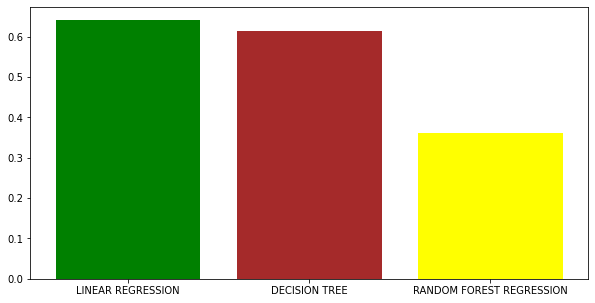

In [51]:
final = [abc,xyz,lmn]
c = {'green','brown','yellow'}
plt.figure(figsize=(10,5))
plt.bar(name,final,color = c)
name=['LINEAR REGRESSION','DECISION TREE','RANDOM FOREST REGRESSION']
print(name[final.index(max(final))]," IS THE BEST FIT!")